<a href="https://colab.research.google.com/github/LazyRook01/NLP/blob/main/TopicModelling_PreviousYear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Model

In [23]:
!pip install pandas==1.5.1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 12.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.3
    Uninstalling pandas-2.1.3:
      Successfully uninstalled pandas-2.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 1.5.1 which is incompatible.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.1 which is incompatible.


In [1]:
import pandas as pd
import spacy
from gensim import corpora
from gensim.models import LdaModel
from pprint import pprint

In [2]:
import os

# Upload the kaggle.json file if you are using Google Colab
from google.colab import files
files.upload()

# Move the kaggle.json file to the correct directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Set appropriate permissions
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d prakharprasad/mobile-reviews


KeyboardInterrupt: ignored

In [3]:

# Unzip the downloaded dataset
!unzip /content/mobile-reviews.zip

# List the files in the current directory
!ls

Archive:  /content/mobile-reviews.zip
  inflating: K8 Reviews v0.2.csv     
'K8 Reviews v0.2.csv'   mobile-reviews.zip   sample_data


In [3]:
df = pd.read_csv("/content/K8 Reviews v0.2.csv")

In [4]:
%%time

import pandas as pd
import spacy
from gensim import corpora
from gensim.models import LdaModel
from pprint import pprint


# Load spaCy model
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])



# Preprocess the text data
def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.is_alpha]
    return tokens

df['processed_review'] = df['review'].apply(preprocess_text)

# Create a dictionary and corpus
dictionary = corpora.Dictionary(df['processed_review'])
corpus = [dictionary.doc2bow(text) for text in df['processed_review']]

# Apply LDA model
lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

# Print topics
pprint(lda_model.print_topics())

# Get the dominant topic for each review
df['dominant_topic'] = df['processed_review'].apply(lambda x: max(lda_model.get_document_topics(dictionary.doc2bow(x)), key=lambda y: y[1])[0])

# Display the DataFrame with the dominant topics
print(df[['review', 'dominant_topic']])

[(0,
  '0.027*"screen" + 0.026*"app" + 0.023*"phone" + 0.018*"work" + 0.013*"get" + '
  '0.012*"video" + 0.012*"time" + 0.011*"day" + 0.010*"glass" + 0.010*"set"'),
 (1,
  '0.190*"nice" + 0.137*"phone" + 0.054*"awesome" + 0.036*"love" + '
  '0.034*"superb" + 0.026*"super" + 0.024*"h" + 0.019*"amazing" + '
  '0.018*"expectation" + 0.011*"feature"'),
 (2,
  '0.289*"mobile" + 0.149*"problem" + 0.082*"heating" + 0.038*"issue" + '
  '0.017*"face" + 0.014*"update" + 0.013*"hang" + 0.013*"system" + '
  '0.012*"handset" + 0.010*"solve"'),
 (3,
  '0.188*"good" + 0.091*"camera" + 0.071*"phone" + 0.033*"quality" + '
  '0.028*"battery" + 0.025*"price" + 0.021*"performance" + 0.016*"great" + '
  '0.013*"feature" + 0.011*"range"'),
 (4,
  '0.081*"phone" + 0.056*"bad" + 0.054*"buy" + 0.024*"issue" + 0.019*"return" '
  '+ 0.015*"Lenovo" + 0.014*"waste" + 0.014*"service" + 0.014*"Amazon" + '
  '0.013*"problem"'),
 (5,
  '0.061*"Lenovo" + 0.052*"note" + 0.029*"well" + 0.023*"update" + '
  '0.022*"like" 

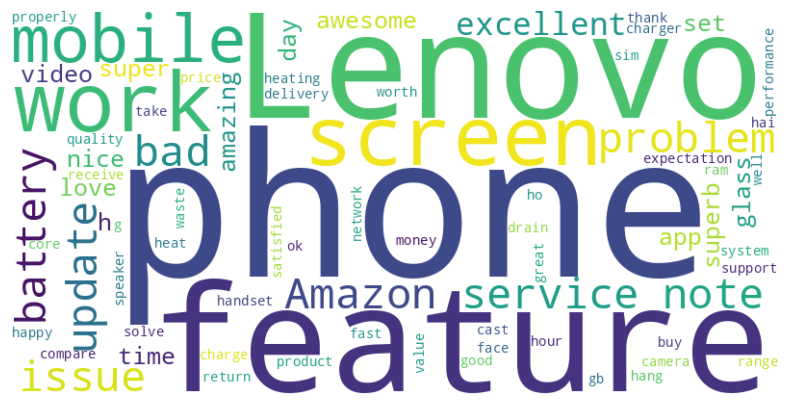

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to get top words from each topic
def get_top_words(lda_model, num_words=10):
    top_words = []
    for topic_id in range(lda_model.num_topics):
        topic_words = lda_model.show_topic(topic_id, topn=num_words)
        top_words.extend([word for word, _ in topic_words])
    return top_words

# Get top words from each topic
top_words = get_top_words(lda_model)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(top_words))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [6]:
import pyLDAvis.gensim


pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.176721 -0.214661       1        1  22.090469
4      0.147257  0.063465       2        1  17.691766
9      0.203935 -0.017208       3        1  12.663732
0      0.145546  0.128592       4        1  11.560795
5      0.067998  0.052911       5        1  11.114966
8     -0.071937  0.211284       6        1   5.756951
2     -0.148363  0.106953       7        1   4.994291
6     -0.196251  0.010521       8        1   4.942265
7     -0.256534 -0.103863       9        1   4.826908
1     -0.068372 -0.237993      10        1   4.357858, topic_info=        Term         Freq        Total Category  logprob  loglift
0       good  6337.000000  6337.000000  Default  30.0000  30.0000
105  product  2201.000000  2201.000000  Default  29.0000  29.0000
30    mobile  2203.000000  2203.000000  Default  28.0000  28.0000
42     phone  6782.000000  6782.000000  Default  27.0000  27.0000
118   camera  3063.000000  3063.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
457        n    59.930202   155.502603  Topic10  -4.7092   2.1797
396        m    47.710204   158.894534  Topic10  -4.9372   1.9301
189  feature    73.950493   867.543091  Topic10  -4.4989   0.6709
800   budget    32.722887   168.166410  Topic10  -5.3143   1.4963
251  perfect    27.112793   124.628526  Topic10  -5.5023   1.6079

[565 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1461      4  0.971613     AMAZON
4         2  0.593608     Amazon
4         8  0.404092     Amazon
279       1  0.038686    Android
279       3  0.005527    Android
...     ...       ...        ...
1741      7  0.899996        wow
1168      9  0.967874         ye
1887      9  0.965589  yesterday
726       6  0.983739       zero
711       1  0.974730       zoom

[823 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 10, 1, 6, 9, 3, 7, 8, 2])

In [ ]:
from gensim.models import CoherenceModel

# Create a list to store coherence scores
coherence_scores = []

# Try different numbers of topics
for num_topics in range(2, 12):
    # Train LDA model
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15, random_state=42)

    # Calculate coherence score
    coherence_model = CoherenceModel(model=lda_model, texts=df['processed_review'], dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    # Store coherence score
    coherence_scores.append((num_topics, coherence_score))

# Display coherence scores
for num_topics, score in coherence_scores:
    print(f"Num Topics: {num_topics}, Coherence Score: {score:.4f}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Train LDA model
lda_model = LdaModel(corpus, num_topics=optimal_num_topics, id2word=dictionary, passes=15, random_state=42)

# Calculate perplexity score
perplexity_score = lda_model.log_perplexity(corpus)

print(f"Perplexity Score: {perplexity_score:.4f}")